# Leave-one-out cross validation and k-Fold cross validation

Import all the packages and functions needed. Because the statsmodels api does not have direct support for cross-validations i.e. LOOCV or K-fold we have to use the sklearn cross_val class instead.

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

%matplotlib inline
plt.style.use('ggplot') # emulate R's pretty plotting

# print numpy arrays with precision 4
np.set_printoptions(precision=4)

Import the data from the file Auto.csv and remove all columns that are not complete

In [3]:
auto = pd.read_csv('./Data/Auto.csv',na_values='?')
auto = auto.dropna()

We want to predict the mpg from the horsepower in the auto dataframe. In the simple linear regression task we already saw, that the linear fit may not be the best choice. 

a) Use the LOOCV to compare all polynomial models with degree up to 5. Compute and visualize the respective MSEs.


 LOOCV Mean Squared Errors for Polynomial Degrees: [np.float64(24.231513517929226), np.float64(19.24821312448967), np.float64(19.3349840640292), np.float64(19.424430310294134), np.float64(19.033213505762642)]


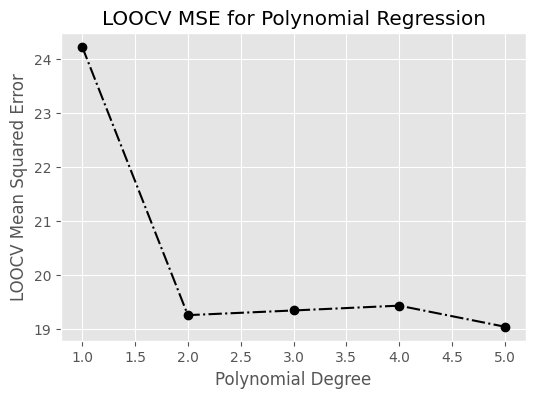

In [8]:
# LOOCV for polynomial models up to degree 5

degrees = [1, 2, 3, 4, 5]
loocv_mse = []

X = auto.horsepower.values
X = X[:,np.newaxis]  # reshape to 2D array for sklearn
y = auto.mpg.values

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    # LOOCV: LeaveOneOut splits
    scores = cross_validate(
        model, X_poly, y,
        cv=auto.shape[0],  # LOOCV: n_samples folds
        scoring='neg_mean_squared_error',
        return_train_score=False
    )
    mse = -scores['test_score'].mean()
    loocv_mse.append(mse)
# print MSEs
print("\n LOOCV Mean Squared Errors for Polynomial Degrees:", loocv_mse)


# Plot LOOCV MSEs
plt.figure(figsize=(6,4))
plt.plot(degrees, loocv_mse, linestyle = '-.', marker='o', color='k')
plt.xlabel('Polynomial Degree')
plt.ylabel('LOOCV Mean Squared Error')
plt.title('LOOCV MSE for Polynomial Regression')
plt.show()

b) Use the $k$-Fold CV with $k=10$ to compare all polynomial models with degree up to 5. Compute and visualize the respective MSEs. (Remember, that you can use the code of task a).)

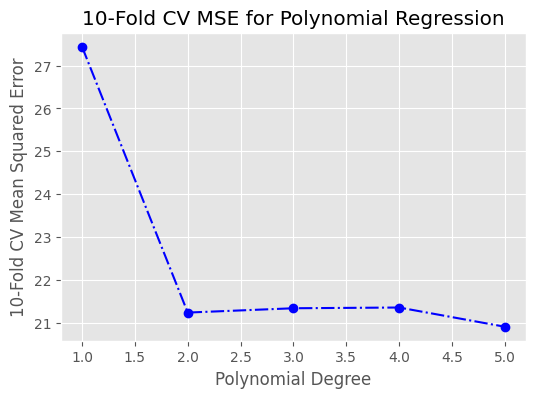

In [10]:
# 10-Fold CV for polynomial models up to degree 5

kfold_mse = []

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    scores = cross_validate(
        model, X_poly, y,
        cv=10, # 10-Fold CV
        scoring='neg_mean_squared_error',
        return_train_score=False
    )
    mse = -scores['test_score'].mean()
    kfold_mse.append(mse)

# Plot 10-Fold CV MSEs
plt.figure(figsize=(6,4))
plt.plot(degrees, kfold_mse, linestyle='-.', marker='o', color='blue')
plt.xlabel('Polynomial Degree')
plt.ylabel('10-Fold CV Mean Squared Error')
plt.title('10-Fold CV MSE for Polynomial Regression')
plt.show()